In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

data_folder = 'data/'

In [ ]:
data_folder = 'data/'

movie_metadata = pd.read_csv(data_folder + "movie.metadata.tsv", sep='\t', lineterminator='\r', on_bad_lines='skip')
character_metadata = pd.read_csv(data_folder + "movie.metadata.tsv", sep='\t', lineterminator='\r', on_bad_lines='skip')


# Exploration of the summaries

In [2]:
summary_file = open(data_folder + 'plot_summaries.txt', 'r', encoding="utf8")
summaries = summary_file.readlines()

#Separate summary and movie ID
summaries = pd.DataFrame([summ.split("\t") for summ in summaries], columns=['movie_ID','summary'])
summaries['summary'] = summaries.summary.replace(r'\n',' ', regex=True) #Remove /n at end of summaries
summaries = summaries.set_index('movie_ID')

In [3]:
#Count number of words in each summary
def count_words_simple(x):
    return len(x.split(" "))

summaries['length'] = summaries['summary'].apply(count_words_simple)

print(summaries.head())

summaries['length'].describe()

                                                    summary  length
movie_ID                                                           
23890098  Shlykov, a hard-working taxi driver and Lyosha...      26
31186339  The nation of Panem consists of a wealthy Capi...     781
20663735  Poovalli Induchoodan  is sentenced for six yea...     505
2231378   The Lemon Drop Kid , a New York City swindler,...     854
595909    Seventh-day Adventist Church pastor Michael Ch...     398


count    42306.000000
mean       313.286437
std        319.313137
min          5.000000
25%         89.000000
50%        189.000000
75%        457.000000
max       4943.000000
Name: length, dtype: float64

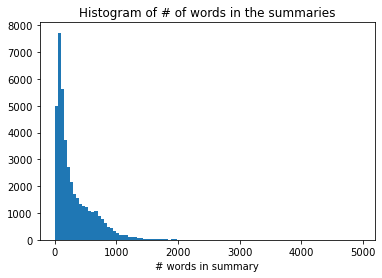

In [87]:
#Let's look at the distibution of the length of the summaries
plt.hist(summaries['length'],bins=100)
plt.xlabel('# words in summary'); plt.title('Histogram of # of words in the summaries')
plt.show()

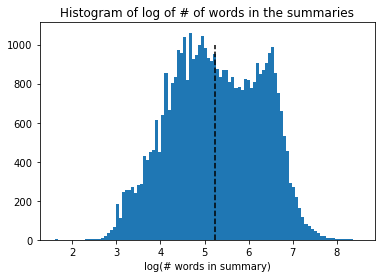

In [88]:
#The distribution is heavy tailed, apply log before binning
plt.hist(np.log(summaries['length']),bins=100)
plt.vlines(np.log(summaries['length']).median(), 0,1000, linestyles='dashed',color = 'black')
plt.xlabel('log(# words in summary)'); plt.title('Histogram of log of # of words in the summaries')
plt.show()

## Parse words 

In [64]:
#pip install spacy
#spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = 'Leila, the helpless girl, is kinapped by the bad Mochie.'
doc = nlp(text)
    
spacy.displacy.render(doc, style='dep')

In [6]:
text = 'Idiana Jons attacks the rebels, while she steals his airplane.'
doc = nlp(text)
    
spacy.displacy.render(doc, style='dep')